**Some numbers re: "how much data do we have"**

(More detailed numbers and visualizations below!)

- There are 22 (module, presentation) combinations (7 modules, 4 presentations; some modules did not run during some presentations). 

- There are ~350-2000 students per (module, presentation) combination.

- For each (student, module, presentation) combination (i.e. each "unique student", where the same person in a different module / presentation is considered as a different "unique student"), the total number of interactions varies widely, following what appears to be an exponential distribution. The median number of interactions is 720, the mean is ~1335. I have not looked into whether the distribution of the number of interactions is significantly different between different (module, presentation) combinations; a priori there is no reason to suspect it would be.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

Import modules and load dataset (streaming OULAD)

In [2]:
df = pd.read_csv('ouladstr.csv')

We first look at number of data rows per module. Note some modules may have more than one presentation, i.e. may run in more than one session/semester.

(array([ 62531., 307903., 200407., 367566., 172360., 523774.,  84442.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

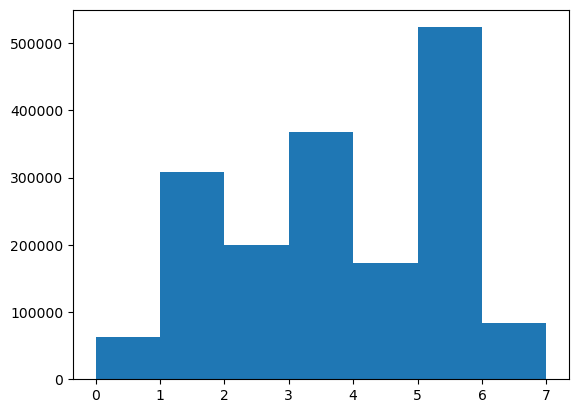

In [3]:
plt.hist(df["code_module"],bins=np.arange(0,8,1))

We next look at the number of data rows per module-presentation (i.e. for modules which run more than once, we consider each run separately). Below, the rows of the array represent modules (0 through 6), the columns repesent presentations (0 through 4). In the 2D histogram, the color scale goes from cold/purple (low numbers / 0) to warm/yellow (high numbers).

(array([[     0.,  32397.,      0.,  30134.],
        [ 77153.,  92683.,  55657.,  82410.],
        [     0.,      0.,  79947., 120460.],
        [ 84538., 117704.,  63374., 101950.],
        [     0.,  62638.,  37124.,  72598.],
        [119150., 154987.,  90927., 158710.],
        [     0.,  32413.,  26429.,  25600.]]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([0, 1, 2, 3, 4]),
 <matplotlib.collections.QuadMesh at 0x1be1bc207d0>)

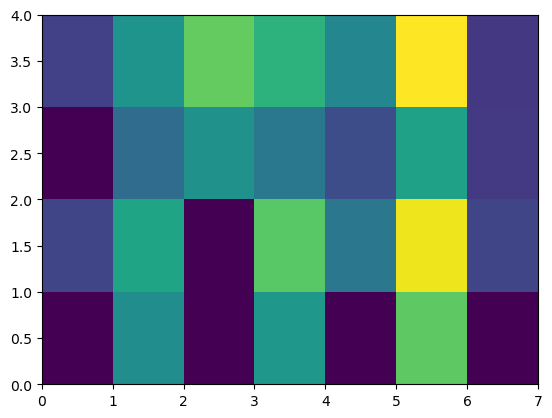

In [4]:
plt.hist2d(df["code_module"],df["code_presentation"],
           bins=[np.arange(0,8,1), np.arange(0,5,1)])

We see that certain modules (e.g. 0, 6) seem to generate less data than others (e.g. 5). 

Also the even presentations (0 and 2) seem to generate less data than the odd ones (1 or 3). We note the even codes correspond to presentations starting in February and the odd ones correspond to presentations starting in October, so this may reflect some version of students being more active in the Fall / first semester of the year compared to the Spring / second semester.

We next look at the number of unique students per module-presentation, and the total/average number of interactions per student in each module-presentation.

In [5]:
dfs = df.drop(['dataplus','date','score'], axis=1)
student_feats = ['gender','region','highest_education','imd_band','age_band',
                 'num_of_prev_attempts','studied_credits','final_result']
tag = ['id_student','code_module','code_presentation']
X1 = dfs.drop(student_feats,axis=1).groupby(tag).sum()
X2y = dfs[tag+student_feats].groupby(tag).mean()
dfc = pd.concat([X1,X2y],axis=1)

In [6]:
tags=dfc.index.to_frame()

In [7]:
count=np.zeros(shape=(7,4))
for module in np.arange(0,7,1):
    for pres in np.arange(0,4,1): 
        count[module,pres] = len(dfc[(tags["code_module"]==module) & 
                        (tags["code_presentation"]==pres)])
        #if count[module,pres]: print("Module", module, "Presentation", pres,
        #                ":", count[module,pres], "students.")

count

array([[   0.,  363.,    0.,  349.],
       [1518., 1857., 1284., 1908.],
       [   0.,    0., 1582., 2162.],
       [1157., 1692., 1060., 1567.],
       [   0.,  915.,  606., 1052.],
       [1420., 2002., 1294., 2027.],
       [   0.,  892.,  770.,  697.]])

Again, in the array above, the columns represent presentations and the rows present modules. Let's visualize that data in a 2D colormap:

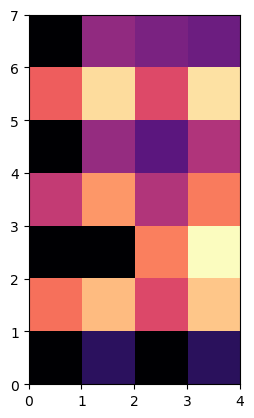

In [8]:
plt.imshow(count, extent=[0.0, 4.0, 0.0, 7.0], origin='lower', cmap='magma')

We see the odd presentations again seem to have more students, and certain modules have more students than others. 

Finally we look at the number of interactions per student-module-presentation. First we pick out the features corresponding to student interactions with the learning platform. We note the values of these features gives the number of times the student has that type of interaction over the course of that module-presentation.

In [9]:
interact_features = df.columns[13:-2]
interact_features

Index(['dualpane', 'externalquiz', 'folder', 'forumng', 'glossary', 'homepage',
       'htmlactivity', 'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki',
       'page', 'questionnaire', 'quiz', 'repeatactivity', 'resource',
       'sharedsubpage', 'subpage', 'url'],
      dtype='object')

We then add up the values of all these features to obtain the total number of recorded interactions between each student and the learning platform (in each module-presentation).

In [10]:
num_interacts=dfc[interact_features].sum(axis=1)
num_interacts.describe()

count    28174.000000
mean      1334.948250
std       1721.892263
min          1.000000
25%        252.000000
50%        720.000000
75%       1737.750000
max      24139.000000
dtype: float64

We see that there is a(t least one) student with only one recorded interaction (for some module-presentation); the median student had about 720 interactions; the mean student had about 1334 interactions (and the standard deviation is huge). So:
- there is a large range of student behaviors from the point of view of total # interactions;;
- the distribution is right-skewed: presumably a relatively small number of high-interaction students are making the mean much higher than the median.
We visualize this data some more below:

(array([1.5033e+04, 5.5810e+03, 2.7840e+03, 1.6650e+03, 1.0570e+03,
        7.2800e+02, 4.5900e+02, 2.9600e+02, 1.6100e+02, 1.3500e+02,
        8.0000e+01, 5.5000e+01, 4.6000e+01, 2.3000e+01, 1.4000e+01,
        9.0000e+00, 7.0000e+00, 1.0000e+01, 1.2000e+01, 7.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 8.05600e+02, 1.61020e+03, 2.41480e+03, 3.21940e+03,
        4.02400e+03, 4.82860e+03, 5.63320e+03, 6.43780e+03, 7.24240e+03,
        8.04700e+03, 8.85160e+03, 9.65620e+03, 1.04608e+04, 1.12654e+04,
        1.20700e+04, 1.28746e+04, 1.36792e+04, 1.44838e+04, 1.52884e+04,
        1.60930e+04, 1.68976e+04, 1.77022e+04, 1.85068e+04, 1.93114e+04,
        2.01160e+04, 2.09206e+04, 2.17252e+04, 2.25298e+04, 2.33344e+04,
        2.41390e+04]),
 <BarContainer object of 30 artists>)

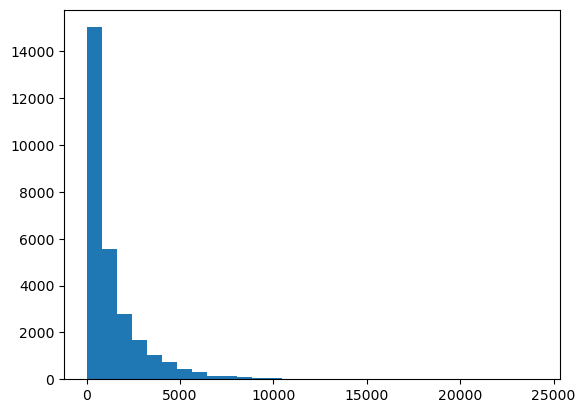

In [13]:
plt.hist(num_interacts,bins=30)

I did not try to actually fit any curves / distributions, but this looks pretty exponential ...

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x1be35caa7e0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1be35817fb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1be35cbacf0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1be358dcda0>}

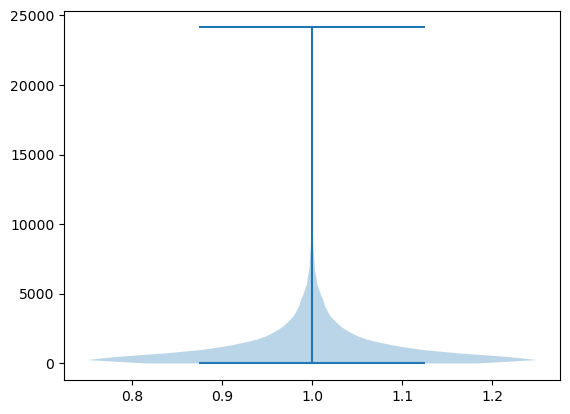

In [12]:
plt.violinplot(num_interacts)